In [1]:
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse
from matplotlib import transforms

import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d



- Steps of spectral clustering algorithm, for a given dataset $X = \{x^{(i)} \in \mathbb{R}^d \}^N_{i=1}$

- 1. Pre-processing: Construct a matrix representation of the graph
- 2. Decomposition: Compute eigenvalues and eigenvectors of the matrix, and map each point to a lower-dimensional representation based on one or more eigenvectors
- 3. Grouping: Assign points to two or more clusters, based on the new representation

<class 'numpy.ndarray'>
(999, 2)


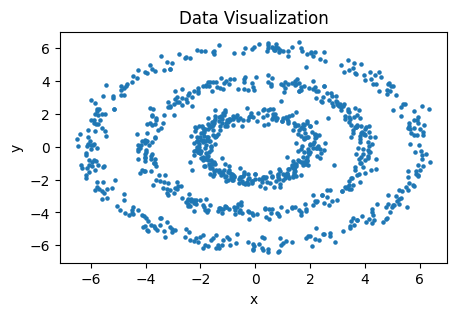

In [2]:
print(type(X))
print(X.shape)
# Plot the reduced latent space
plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title('Data Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

(999, 3)
0.1


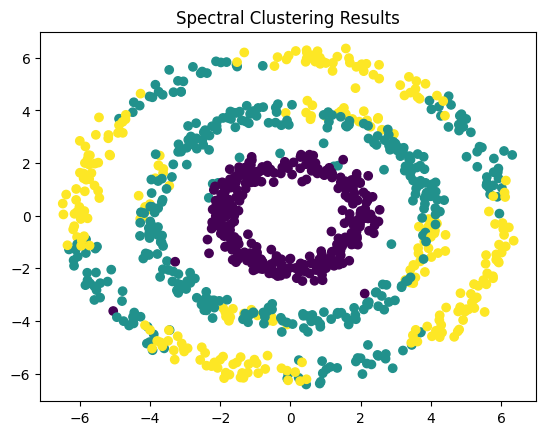

(999, 3)
0.2


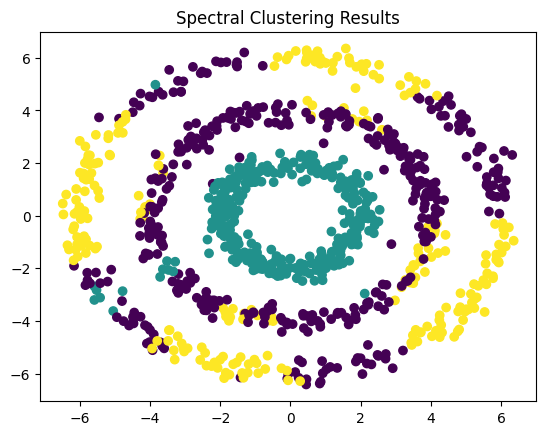

(999, 3)
0.3


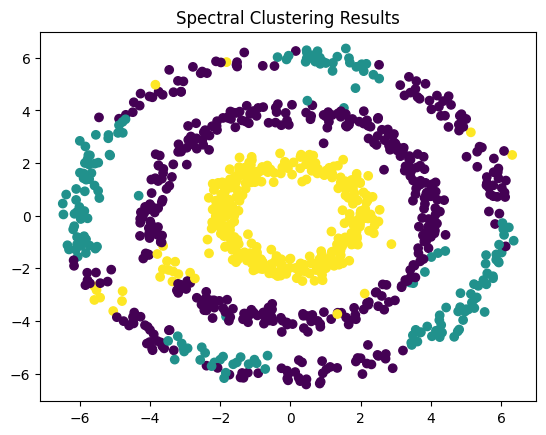

(999, 3)
0.4


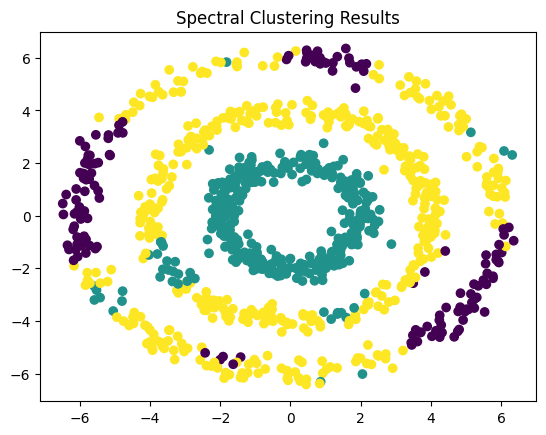

(999, 3)
0.5


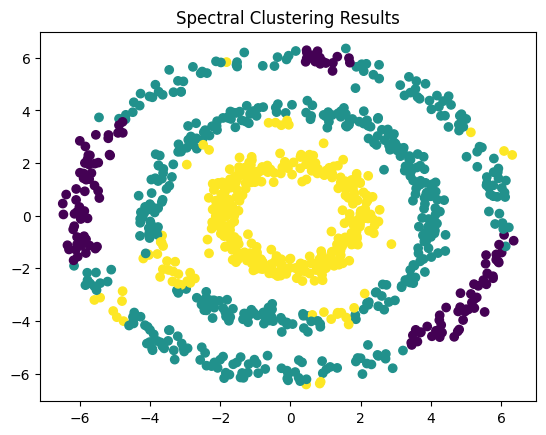

(999, 3)
0.6


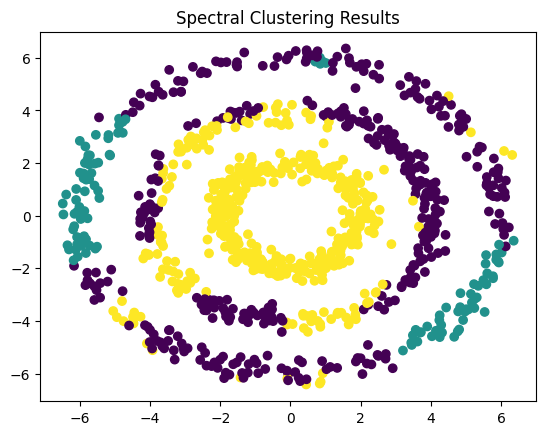

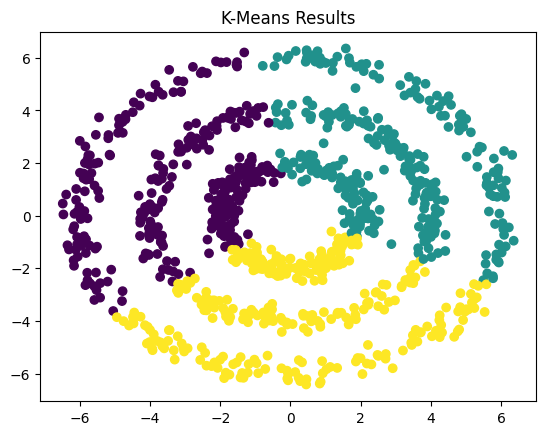

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans




# Step 1: Choose a Gaussian similarity kernel
def rbf_kernel(u, v, gamma=1.0):
  return np.exp(-gamma * np.linalg.norm(u-v)**2)

def customized_kernel(u,v,gamma=1.0):
  return -np.exp(-gamma * np.linalg.norm(u-v)**2 / (1 + np.exp(-gamma * np.linalg.norm(u-v)**2)))

def affinity_matrix(X, gamma=1.0):
  N = len(X)
  W = np.zeros((N, N))

  for i in range(N):
    for j in range(N):
      W[i, j] = rbf_kernel(X[i], X[j], gamma)
  return W

gamma_list = [1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1]

# Step 2: Calculate matrix W
for g in gamma_list:
  W = affinity_matrix(X, gamma=g)

  # Step 3: Calculate diagonal degree matrix D
  D = np.diag(np.sum(W, axis=1))

  # Step 4: Calculate Laplacian matrix L
  L = D - W

  # Step 5: Normalize Laplacian matrix B
  B = np.linalg.inv(D) @ L

  # Step 6: Calculate eigen decomposition of B
  eigenvalues, eigenvectors = np.linalg.eigh(B)

  # Step 7: Exclude the first smallest eigenvector
  k = 3
  X_hat = eigenvectors[:, 1:k+1]
  print(X_hat.shape)

  # Step 8: Normalize X_hat
  X_hat_normalized = np.linalg.norm(X_hat, axis=1, keepdims=True)

  # Step 9: Perform k-means on X_hat_normalized
  def k_means(X, k, max_iters=100):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iters):
      labels = np.argmin(cdist(X, centroids), axis=1)
      centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    return labels

  # Perform k-means on X_hat_normalized
  labels_spectral = k_means(X_hat_normalized, k)

  # Visualize spectral clustering results
  print(g)
  plt.scatter(X[:, 0], X[:, 1], c=labels_spectral, cmap='viridis', marker='o')
  plt.title(f'Spectral Clustering Results')
  plt.show()


# Compare with K-Means
labels_kmeans = k_means(X, k)

# Visualize K-Means clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', marker='o')
plt.title('K-Means Results')
plt.show()
